## Importing required libraries 

In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
pd.set_option('display.max_columns', None)
%matplotlib inline

import warnings
warnings.filterwarnings('ignore')

## Reading and Understanding The dataset

In [3]:
day_df=pd.read_csv('day.csv')

In [4]:
day_df.head()

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,1,01-01-2018,1,0,1,0,1,1,2,14.110847,18.18125,80.5833,10.749882,331,654,985
1,2,02-01-2018,1,0,1,0,2,1,2,14.902598,17.68695,69.6087,16.652113,131,670,801
2,3,03-01-2018,1,0,1,0,3,1,1,8.050924,9.47025,43.7273,16.636703,120,1229,1349
3,4,04-01-2018,1,0,1,0,4,1,1,8.200000,10.60610,59.0435,10.739832,108,1454,1562
4,5,05-01-2018,1,0,1,0,5,1,1,9.305237,11.46350,43.6957,12.522300,82,1518,1600


In [5]:
day_df.shape

(730, 16)

In [6]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 16 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     730 non-null    int64  
 1   dteday      730 non-null    object 
 2   season      730 non-null    int64  
 3   yr          730 non-null    int64  
 4   mnth        730 non-null    int64  
 5   holiday     730 non-null    int64  
 6   weekday     730 non-null    int64  
 7   workingday  730 non-null    int64  
 8   weathersit  730 non-null    int64  
 9   temp        730 non-null    float64
 10  atemp       730 non-null    float64
 11  hum         730 non-null    float64
 12  windspeed   730 non-null    float64
 13  casual      730 non-null    int64  
 14  registered  730 non-null    int64  
 15  cnt         730 non-null    int64  
dtypes: float64(4), int64(11), object(1)
memory usage: 91.4+ KB


In [7]:
day_df.isnull().sum()

instant       0
dteday        0
season        0
yr            0
mnth          0
holiday       0
weekday       0
workingday    0
weathersit    0
temp          0
atemp         0
hum           0
windspeed     0
casual        0
registered    0
cnt           0
dtype: int64

In [8]:
day_df.describe(include='all')

,instant,dteday,season,yr,mnth,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,730.000000,730,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000,730.000000
unique,NaN,730,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,01-01-2018,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,1,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,365.500000,NaN,2.498630,0.500000,6.526027,0.028767,2.995890,0.690411,1.394521,20.319259,23.726322,62.765175,12.763620,849.249315,3658.757534,4508.006849
std,210.877136,NaN,1.110184,0.500343,3.450215,0.167266,2.000339,0.462641,0.544807,7.506729,8.150308,14.237589,5.195841,686.479875,1559.758728,1936.011647
min,1.000000,NaN,1.000000,0.000000,1.000000,0.000000,0.000000,0.000000,1.000000,2.424346,3.953480,0.000000,1.500244,2.000000,20.000000,22.000000
25%,183.250000,NaN,2.000000,0.000000,4.000000,0.000000,1.000000,0.000000,1.000000,13.811885,16.889713,52.000000,9.041650,316.250000,2502.250000,3169.750000
50%,365.500000,NaN,3.000000,0.500000,7.000000,0.000000,3.000000,1.000000,1.000000,20.465826,24.368225,62.625000,12.125325,717.000000,3664.500000,4548.500000
75%,547.750000,NaN,3.000000,1.000000,10.000000,0.000000,5.000000,1.000000,2.000000,26.880615,30.445775,72.989575,15.625589,1096.500000,4783.250000,5966.000000


### Insights & Information :


- All other are either float or integer type, Except 'dteday' whose dtype is object (contains date type info).
- No null/missing values.
- Some columns that are categorical in nature, but in integer/float type.
- The given dataset has 730 rowns and 16 columns.

## Dropping columns

In [9]:
# instant columns contains index values only, not requried
day_df.drop(['instant'],axis=1,inplace=True)

In [10]:
# we already have yr and month columns, so dteday in not required
day_df.drop(['dteday'],axis=1,inplace=True)

In [11]:
# our target variable is cnt, hence we can delete casual and registered columns
day_df.drop(['casual','registered'],axis=1,inplace=True)

In [12]:
# checking of the dataset
day_df.shape

(730, 12)

In [13]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      730 non-null    int64  
 1   yr          730 non-null    int64  
 2   mnth        730 non-null    int64  
 3   holiday     730 non-null    int64  
 4   weekday     730 non-null    int64  
 5   workingday  730 non-null    int64  
 6   weathersit  730 non-null    int64  
 7   temp        730 non-null    float64
 8   atemp       730 non-null    float64
 9   hum         730 non-null    float64
 10  windspeed   730 non-null    float64
 11  cnt         730 non-null    int64  
dtypes: float64(4), int64(8)
memory usage: 68.6 KB


## EDA & Visualising the Data

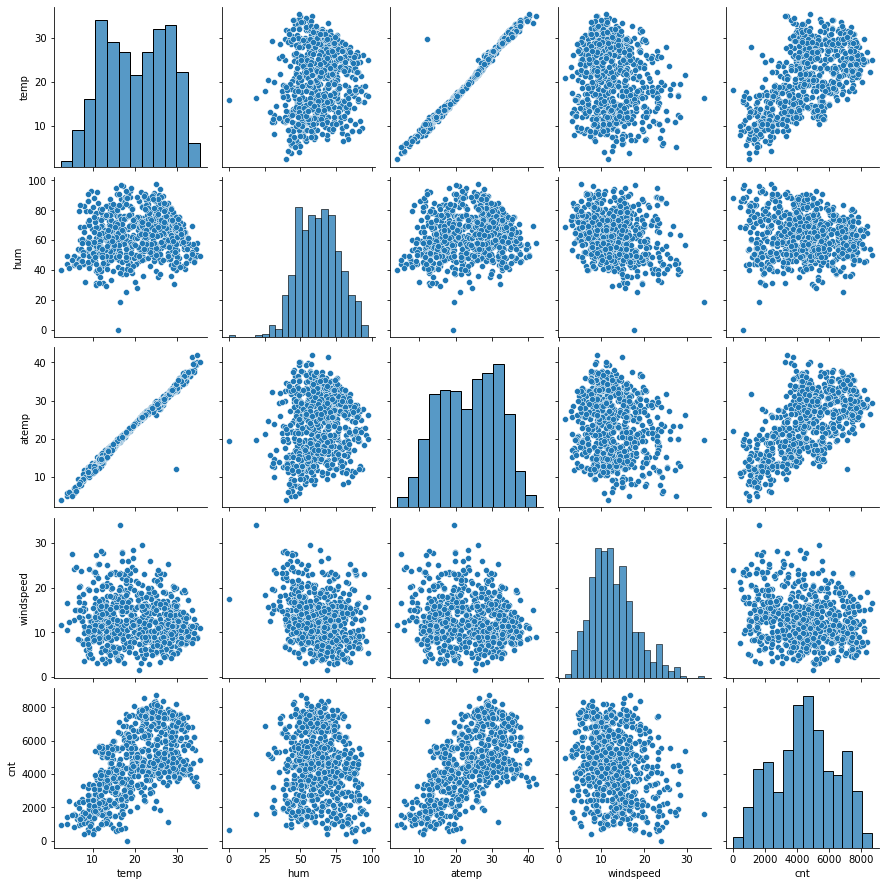

In [14]:
# Pairplot of numerical variables

sns.pairplot(day_df, vars=['temp','hum','atemp','windspeed',"cnt"])
plt.show()

### Info:
- There is linear relationship between temp and atemp.
- There is some positive linear trend between temp-cnt and atemp-cnt.

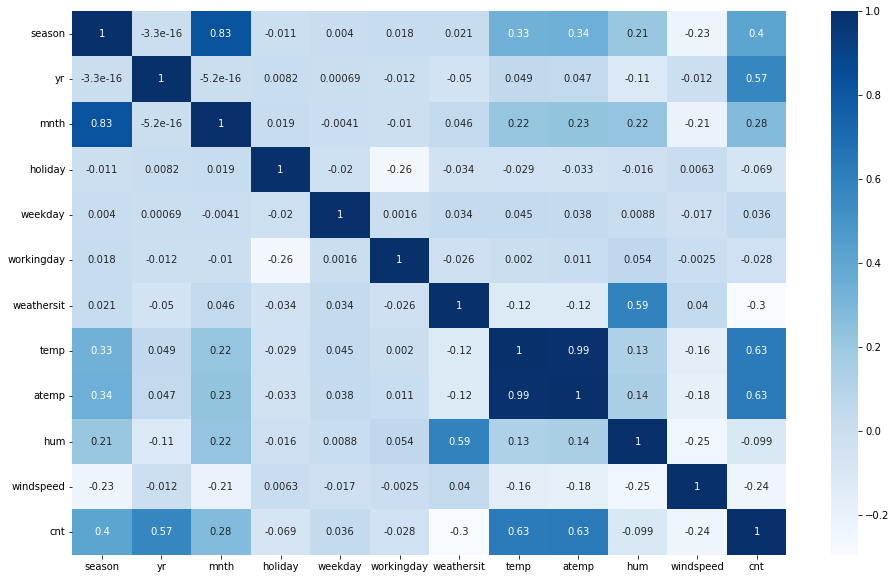

In [15]:
# Correlation between variables

plt.figure(figsize = (16, 10))
sns.heatmap(day_df.corr(), annot = True, cmap="Blues")
plt.show()

### Info:
- There is a correlation of 0.63 between cnt-temp and cnt-atemp
- There is a correlation of 0.99 between temp and atemp

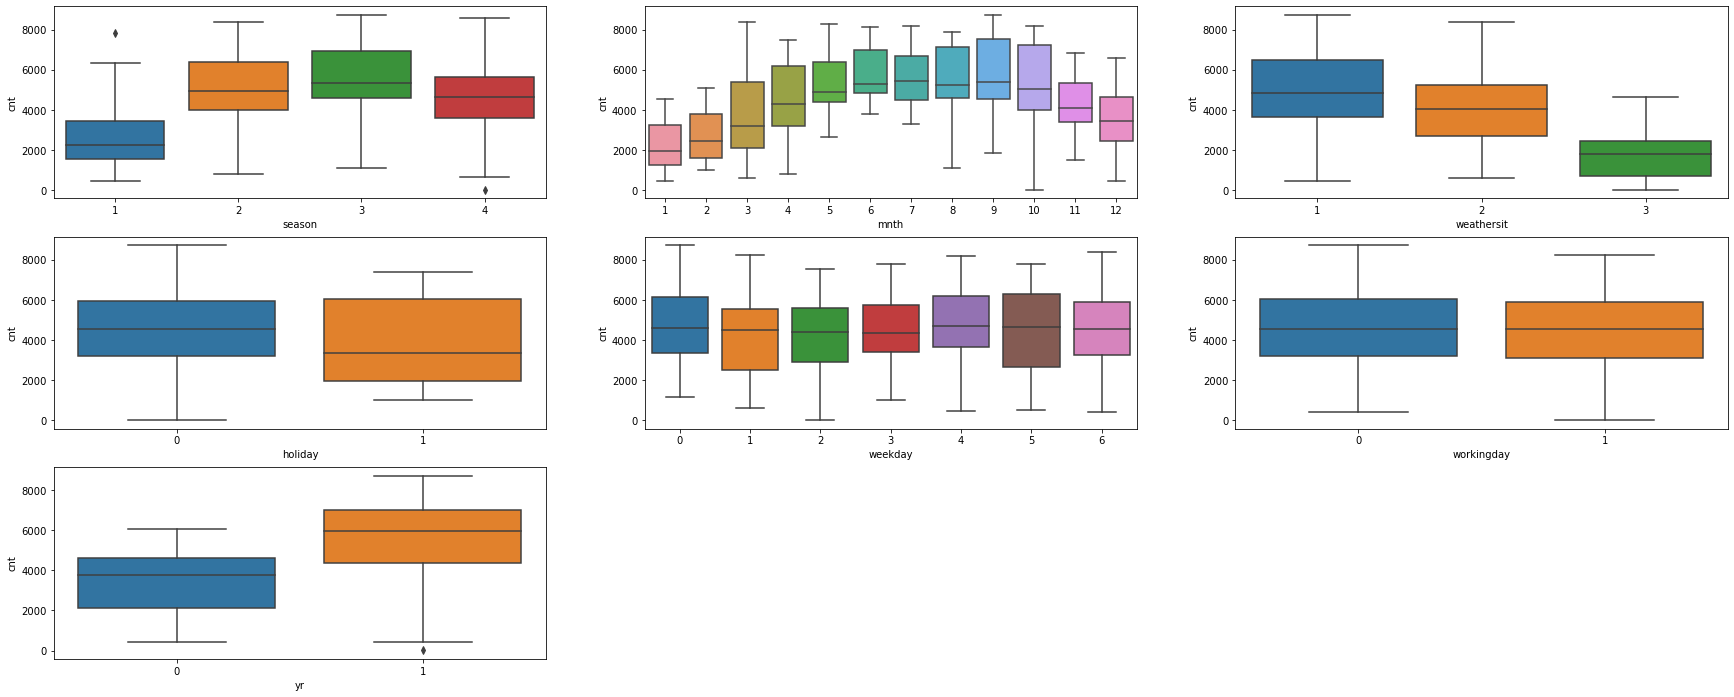

In [16]:
# visualizing the categorical columns
# to see how predictor variable stands against the target variable

# Boxplot of categorical variables

plt.figure(figsize=(30, 12))
plt.subplot(3,3,1)
sns.boxplot(x = 'season', y = 'cnt', data = day_df)
plt.subplot(3,3,2)
sns.boxplot(x = 'mnth', y = 'cnt', data = day_df)
plt.subplot(3,3,3)
sns.boxplot(x = 'weathersit', y = 'cnt', data = day_df)
plt.subplot(3,3,4)
sns.boxplot(x = 'holiday', y = 'cnt', data = day_df)
plt.subplot(3,3,5)
sns.boxplot(x = 'weekday', y = 'cnt', data = day_df)
plt.subplot(3,3,6)
sns.boxplot(x = 'workingday', y = 'cnt', data = day_df)
plt.subplot(3,3,7)
sns.boxplot(x = 'yr', y = 'cnt', data = day_df)
plt.show()

### Info :

- Season: Most of the bike booking were happening in season 2 and season 3 with a median of over 5000 booking. This indicates, season can be a good predictor for the dependent variable.

- Mnth: Most bike booking were happening in the months 5,6,7,8,9 & 10 with a median of over 4000 booking per month. This indicates, mnth has some trend for bookings and can be a good predictor for the dependent variable.

- Weathersit: Most of the bike booking were happening during ‘weathersit1 with a median of close to 5000 booking followed by weathersit2 with median above 4000 .This indicates, weathersit does show some trend towards the bike bookings can be a good predictor for the dependent variable.

- Holiday: Most of the bike booking were happening when it is not a holiday. This indicates, holiday can't be a good predictor for the dependent variable for increasing bookings.

- Weekday: weekday variable shows very close trend having their independent medians between 4000 to 5000 bookings. This variable can have some or no influence towards the predictor.

- Workingday: Almost 69% of the bike booking were happening in ‘workingday’ with a median of close to 5000 booking (for the period of 2 years). This indicates, workingday can be a good predictor for the dependent variable

- Yr: 2019 is clearly a better year the bike booking. This indicates it could be useful.

# Creating dummy variables

In [17]:
# Creating DUMMY variables for 4 categorical variables 'mnth', 'weekday', 'season' & 'weathersit'.
# Convert to 'object' data type

day_df['season']=day_df['season'].astype('category')
day_df['weathersit']=day_df['weathersit'].astype('category')
day_df['mnth']=day_df['mnth'].astype('category')
day_df['weekday']=day_df['weekday'].astype('category')

In [18]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 12 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   season      730 non-null    category
 1   yr          730 non-null    int64   
 2   mnth        730 non-null    category
 3   holiday     730 non-null    int64   
 4   weekday     730 non-null    category
 5   workingday  730 non-null    int64   
 6   weathersit  730 non-null    category
 7   temp        730 non-null    float64 
 8   atemp       730 non-null    float64 
 9   hum         730 non-null    float64 
 10  windspeed   730 non-null    float64 
 11  cnt         730 non-null    int64   
dtypes: category(4), float64(4), int64(4)
memory usage: 49.7 KB


In [19]:
# creating dummy variables for 'mnth', 'weekday', 'season' & 'weathersit'
# dropping 1st dummy variable for each
# dropping the original columns

day_df=pd.get_dummies(data=day_df,drop_first=True)

day_df.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
0,0,0,1,14.110847,18.18125,80.5833,10.749882,985,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,1,0
1,0,0,1,14.902598,17.68695,69.6087,16.652113,801,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
2,0,0,1,8.050924,9.47025,43.7273,16.636703,1349,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0
3,0,0,1,8.200000,10.60610,59.0435,10.739832,1562,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0
4,0,0,1,9.305237,11.46350,43.6957,12.522300,1600,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0


In [20]:
day_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 730 entries, 0 to 729
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            730 non-null    int64  
 1   holiday       730 non-null    int64  
 2   workingday    730 non-null    int64  
 3   temp          730 non-null    float64
 4   atemp         730 non-null    float64
 5   hum           730 non-null    float64
 6   windspeed     730 non-null    float64
 7   cnt           730 non-null    int64  
 8   season_2      730 non-null    uint8  
 9   season_3      730 non-null    uint8  
 10  season_4      730 non-null    uint8  
 11  mnth_2        730 non-null    uint8  
 12  mnth_3        730 non-null    uint8  
 13  mnth_4        730 non-null    uint8  
 14  mnth_5        730 non-null    uint8  
 15  mnth_6        730 non-null    uint8  
 16  mnth_7        730 non-null    uint8  
 17  mnth_8        730 non-null    uint8  
 18  mnth_9        730 non-null    

In [21]:
day_df.shape

(730, 30)

## Splitting the data
- Train:Test in 70:30 ratio

In [22]:
# Using sklearn package for data split
from sklearn.model_selection import train_test_split

# We have to specify 'random_state' so that the train and test data set always have the same rows, respectively

np.random.seed(0)
df_train,df_test=train_test_split(day_df,train_size=0.7,test_size=0.3,random_state=1000)

In [23]:
print(df_train.shape)
print(df_test.shape)

(510, 30)
(219, 30)


In [24]:
df_train.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
544,1,0,0,34.200847,39.33065,48.8750,11.082939,5463,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,1,0,0
674,1,0,1,11.514153,14.07835,56.7083,11.625371,5686,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
477,1,0,1,13.188347,15.05625,76.6667,20.334232,3214,1,0,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,1,0
176,0,0,1,27.880000,31.88145,51.3333,6.333731,5305,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0,1,0,0,0,0,0,0
655,1,0,1,21.422500,25.63125,72.8333,15.874779,7509,0,0,1,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,0,1,0


In [25]:
df_train.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 510 entries, 544 to 599
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            510 non-null    int64  
 1   holiday       510 non-null    int64  
 2   workingday    510 non-null    int64  
 3   temp          510 non-null    float64
 4   atemp         510 non-null    float64
 5   hum           510 non-null    float64
 6   windspeed     510 non-null    float64
 7   cnt           510 non-null    int64  
 8   season_2      510 non-null    uint8  
 9   season_3      510 non-null    uint8  
 10  season_4      510 non-null    uint8  
 11  mnth_2        510 non-null    uint8  
 12  mnth_3        510 non-null    uint8  
 13  mnth_4        510 non-null    uint8  
 14  mnth_5        510 non-null    uint8  
 15  mnth_6        510 non-null    uint8  
 16  mnth_7        510 non-null    uint8  
 17  mnth_8        510 non-null    uint8  
 18  mnth_9        510 non-null  

In [26]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,16.195000,20.04355,75.8750,3.834075,4035,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
320,0,0,0,14.008347,16.16105,57.5833,20.459254,3053,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
189,0,0,1,30.066653,33.20790,60.9167,11.250104,5336,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
382,1,0,1,12.436653,13.76270,44.3333,27.833743,3376,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
388,1,0,1,14.042500,17.45540,83.5833,8.292389,4339,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [27]:
df_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 30 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   cnt           219 non-null    int64  
 8   season_2      219 non-null    uint8  
 9   season_3      219 non-null    uint8  
 10  season_4      219 non-null    uint8  
 11  mnth_2        219 non-null    uint8  
 12  mnth_3        219 non-null    uint8  
 13  mnth_4        219 non-null    uint8  
 14  mnth_5        219 non-null    uint8  
 15  mnth_6        219 non-null    uint8  
 16  mnth_7        219 non-null    uint8  
 17  mnth_8        219 non-null    uint8  
 18  mnth_9        219 non-null  

## Rescaling the Features

In [28]:
# importing MinMaxScaler for rescalling 

from sklearn.preprocessing import MinMaxScaler

In [29]:
scaler = MinMaxScaler()

In [30]:
# Apply scaler() to all numeric variables except the 'dummy' variables
numv=['atemp', 'hum','temp','windspeed','cnt']

df_train[numv]=scaler.fit_transform(df_train[numv])

In [31]:
df_train.describe(include='all')

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000,510.000000
mean,0.500000,0.025490,0.682353,0.522749,0.507177,0.650813,0.347478,0.514357,0.266667,0.250980,0.233333,0.076471,0.084314,0.084314,0.094118,0.094118,0.082353,0.082353,0.068627,0.088235,0.076471,0.080392,0.143137,0.145098,0.141176,0.131373,0.143137,0.149020,0.347059,0.027451
std,0.500491,0.157763,0.466018,0.239351,0.219530,0.145303,0.161325,0.220019,0.442651,0.434003,0.423368,0.266010,0.278131,0.278131,0.292279,0.292279,0.275172,0.275172,0.253068,0.283915,0.266010,0.272166,0.350557,0.352545,0.348545,0.338139,0.350557,0.356457,0.476502,0.163554
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.318212,0.323000,0.540738,0.232053,0.367234,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.500000,0.000000,1.000000,0.522966,0.518051,0.655431,0.328844,0.513921,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.732894,0.690137,0.754508,0.435596,0.676542,1.000000,0.750000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


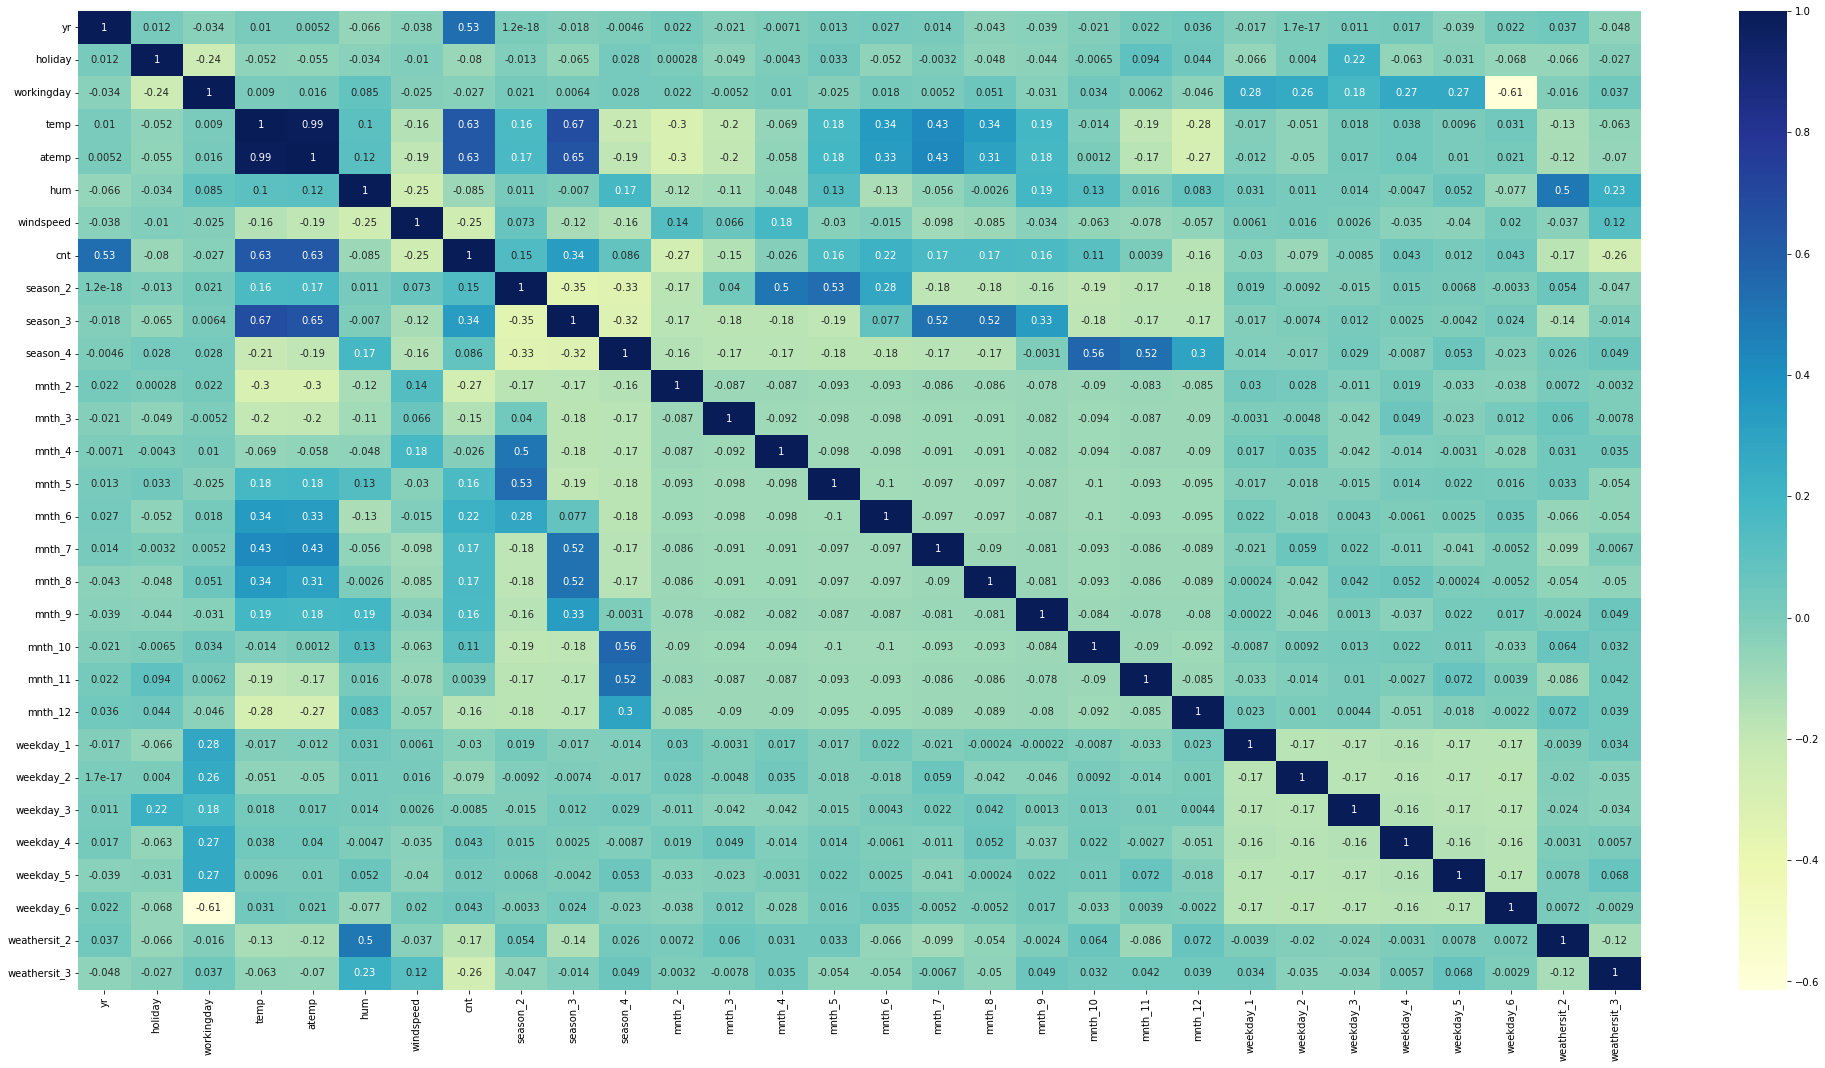

In [32]:
# Let's check the correlation coefficients to see which variables are highly correlated

plt.figure(figsize = (35, 18))
sns.heatmap(df_train.corr(), annot = True, cmap="YlGnBu")
plt.show()

## Dividing into X and Y sets for the model building

In [33]:
y_train = df_train.pop('cnt')
X_train = df_train

In [34]:
X_train.shape

(510, 29)

In [35]:
y_train.shape

(510,)

### Will be using RFE and statsmodel method combined for optimum final model 

In [36]:
# Using RFE method for variable selection
# Importing RFE and LinearRegression 

from sklearn.feature_selection import RFE
from sklearn.linear_model import LinearRegression

In [37]:
# Running RFE with the output number of the variable equal to 15
lm=LinearRegression()
lm.fit(X_train,y_train)

rfe= RFE(lm)
rfe=rfe.fit(X_train,y_train)

In [38]:
list(zip(X_train.columns,rfe.support_,rfe.ranking_))

[('yr', True, 1),
 ('holiday', False, 11),
 ('workingday', True, 1),
 ('temp', True, 1),
 ('atemp', False, 10),
 ('hum', True, 1),
 ('windspeed', True, 1),
 ('season_2', True, 1),
 ('season_3', False, 2),
 ('season_4', True, 1),
 ('mnth_2', False, 13),
 ('mnth_3', False, 7),
 ('mnth_4', False, 8),
 ('mnth_5', False, 6),
 ('mnth_6', False, 9),
 ('mnth_7', False, 16),
 ('mnth_8', False, 5),
 ('mnth_9', True, 1),
 ('mnth_10', False, 4),
 ('mnth_11', False, 14),
 ('mnth_12', False, 12),
 ('weekday_1', True, 1),
 ('weekday_2', True, 1),
 ('weekday_3', True, 1),
 ('weekday_4', True, 1),
 ('weekday_5', True, 1),
 ('weekday_6', False, 15),
 ('weathersit_2', False, 3),
 ('weathersit_3', True, 1)]

In [39]:
col = X_train.columns[rfe.support_]
col

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weathersit_3'],
      dtype='object')

In [40]:
X_train.columns[~rfe.support_]

Index(['holiday', 'atemp', 'season_3', 'mnth_2', 'mnth_3', 'mnth_4', 'mnth_5',
       'mnth_6', 'mnth_7', 'mnth_8', 'mnth_10', 'mnth_11', 'mnth_12',
       'weekday_6', 'weathersit_2'],
      dtype='object')

In [41]:
# Creating X_test dataframe with RFE selected variables
X_train_rfe = X_train[col]

In [42]:
X_train_rfe.columns

Index(['yr', 'workingday', 'temp', 'hum', 'windspeed', 'season_2', 'season_4',
       'mnth_9', 'weekday_1', 'weekday_2', 'weekday_3', 'weekday_4',
       'weekday_5', 'weathersit_3'],
      dtype='object')

## Building model using statsmodel, for the detailed statistics

### Model 1

In [43]:
# Check for the VIF values of the feature variables. 

from statsmodels.stats.outliers_influence import variance_inflation_factor

# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe.values, i) for i in range(X_train_rfe.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.85
3,hum,11.02
8,weekday_1,8.73
12,weekday_5,8.53
9,weekday_2,8.47
11,weekday_4,8.10
10,weekday_3,7.13
2,temp,5.88
4,windspeed,4.18
0,yr,1.93


In [44]:
#BUILDING MODEL USING STATSMODEL:
import statsmodels.api as sm  

# Adding a constant variable 
X_train_lm1 = sm.add_constant(X_train_rfe)

In [45]:
# Running the linear model
lr1=sm.OLS(y_train,X_train_lm1).fit()

In [46]:
#Let's see the summary of our linear model
print(lr1.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.822
Model:                            OLS   Adj. R-squared:                  0.817
Method:                 Least Squares   F-statistic:                     163.4
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.97e-175
Time:                        14:46:13   Log-Likelihood:                 489.22
No. Observations:                 510   AIC:                            -948.4
Df Residuals:                     495   BIC:                            -884.9
Df Model:                          14                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.2983      0.028     10.689   

### Model 2

In [47]:
X_train_rfe2 = X_train_rfe.drop(["hum"], axis = 1)

In [48]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs
vif=pd.DataFrame()
vif['Features']=X_train_rfe2.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe2.values, i) for i in range(X_train_rfe2.shape[1])]
vif['VIF'] = round(vif['VIF'], 2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,34.83
7,weekday_1,8.61
11,weekday_5,8.42
8,weekday_2,8.34
10,weekday_4,8.02
9,weekday_3,7.04
2,temp,4.02
3,windspeed,3.50
0,yr,1.88
4,season_2,1.60


In [49]:
# Adding a constant variable 
X_train_lm2 = sm.add_constant(X_train_rfe2)

# Running the linear model
lr2=sm.OLS(y_train,X_train_lm2).fit()

#Let's see the summary of our linear model
print(lr2.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.794
Model:                            OLS   Adj. R-squared:                  0.789
Method:                 Least Squares   F-statistic:                     147.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.05e-160
Time:                        14:46:13   Log-Likelihood:                 451.90
No. Observations:                 510   AIC:                            -875.8
Df Residuals:                     496   BIC:                            -816.5
Df Model:                          13                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1105      0.019      5.686   

### Model 3

In [50]:
X_train_rfe3=X_train_rfe2.drop(['weekday_5'],axis=1)

In [51]:
# Create a dataframe that will contain the names of all the feature variables and their respective VIFs

vif=pd.DataFrame()
vif['Features']=X_train_rfe3.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe3.values,i) for i in range(X_train_rfe3.shape[1])]
vif['VIF']=round(vif["VIF"],2)
vif = vif.sort_values(by = "VIF", ascending = False)
vif

,Features,VIF
1,workingday,5.80
2,temp,4.00
3,windspeed,3.49
7,weekday_1,1.91
8,weekday_2,1.89
0,yr,1.88
10,weekday_4,1.84
9,weekday_3,1.73
4,season_2,1.60
5,season_4,1.35


- Need to drop workingday due to high VIF

### Model 4

In [52]:
X_train_rfe4=X_train_rfe3.drop(['workingday'],axis=1)

In [53]:
# Checking VIF

vif=pd.DataFrame()
vif['Features']=X_train_rfe4.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe4.values,i) for i in range(X_train_rfe4.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.88
1,temp,3.81
2,windspeed,3.40
3,season_2,1.60
4,season_4,1.32
5,mnth_9,1.17
6,weekday_1,1.28
7,weekday_2,1.28
8,weekday_3,1.29
9,weekday_4,1.27


In [54]:
# adding constant
X_train_lm4=sm.add_constant(X_train_rfe4)

# fiiting and running the model
lr4=sm.OLS(y_train,X_train_lm4).fit()

# Summary
print(lr4.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.791
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     170.9
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.86e-161
Time:                        14:46:13   Log-Likelihood:                 447.61
No. Observations:                 510   AIC:                            -871.2
Df Residuals:                     498   BIC:                            -820.4
Df Model:                          11                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1068      0.019      5.661   

- Need to drop 'weekday_1' due to high p-value

### Model 5

In [55]:
X_train_rfe5=X_train_rfe4.drop(['weekday_1'],axis=1)

In [56]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe5.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe5.values,i) for i in range(X_train_rfe5.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.72
2,windspeed,3.30
3,season_2,1.59
4,season_4,1.31
5,mnth_9,1.17
6,weekday_2,1.22
7,weekday_3,1.23
8,weekday_4,1.21
9,weathersit_3,1.06


In [57]:
# adding constant
X_train_lm5=sm.add_constant(X_train_rfe5)

# fitting and running model
lr5=sm.OLS(y_train,X_train_lm5).fit()

# summary
print(lr5.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     187.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          4.55e-162
Time:                        14:46:13   Log-Likelihood:                 447.10
No. Observations:                 510   AIC:                            -872.2
Df Residuals:                     499   BIC:                            -825.6
Df Model:                          10                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1031      0.019      5.571   

- Dropping weekday_4 due to high p-value

### Model 6

In [58]:
X_train_rfe6=X_train_rfe5.drop(['weekday_4'],axis=1)

In [59]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe6.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe6.values,i) for i in range(X_train_rfe6.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.62
2,windspeed,3.28
3,season_2,1.59
4,season_4,1.31
5,mnth_9,1.17
6,weekday_2,1.18
7,weekday_3,1.19
8,weathersit_3,1.06


In [60]:
# adding constant
X_train_lm6=sm.add_constant(X_train_rfe6)

# fitting and running model
lr6=sm.OLS(y_train,X_train_lm6).fit()

# summary
print(lr6.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.790
Model:                            OLS   Adj. R-squared:                  0.786
Method:                 Least Squares   F-statistic:                     209.1
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          3.08e-163
Time:                        14:46:13   Log-Likelihood:                 447.09
No. Observations:                 510   AIC:                            -874.2
Df Residuals:                     500   BIC:                            -831.8
Df Model:                           9                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.1028      0.018      5.610   

- Dropping feature 'weekday_3' due to high p-value

### Model 7

In [61]:
X_train_rfe7=X_train_rfe6.drop(['weekday_3'],axis=1)

In [62]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe7.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe7.values,i) for i in range(X_train_rfe7.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.87
1,temp,3.57
2,windspeed,3.24
3,season_2,1.59
4,season_4,1.30
5,mnth_9,1.17
6,weekday_2,1.16
7,weathersit_3,1.06


In [63]:
# adding constant
X_train_lm7=sm.add_constant(X_train_rfe7)

# fitting and running model
lr7=sm.OLS(y_train,X_train_lm7).fit()

# summary
print(lr7.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.788
Model:                            OLS   Adj. R-squared:                  0.785
Method:                 Least Squares   F-statistic:                     232.8
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          2.20e-163
Time:                        14:46:13   Log-Likelihood:                 444.61
No. Observations:                 510   AIC:                            -871.2
Df Residuals:                     501   BIC:                            -833.1
Df Model:                           8                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0989      0.018      5.404   

- Dropping weekday_2 due to high p-value

### Model 8

In [64]:
X_train_rfe8=X_train_rfe7.drop(['weekday_2'],axis=1)

In [65]:
# Checking VIF
vif=pd.DataFrame()
vif['Features']=X_train_rfe8.columns
vif['VIF']=[variance_inflation_factor(X_train_rfe8.values,i) for i in range(X_train_rfe8.shape[1])]
vif['VIF']=round(vif['VIF'],2)
vif

,Features,VIF
0,yr,1.86
1,temp,3.55
2,windspeed,3.17
3,season_2,1.59
4,season_4,1.30
5,mnth_9,1.16
6,weathersit_3,1.06


In [66]:
# adding constant
X_train_lm8=sm.add_constant(X_train_rfe8)

# fitting and running model
lr8=sm.OLS(y_train,X_train_lm8).fit()

# summary
print(lr8.summary())

                            OLS Regression Results                            
Dep. Variable:                    cnt   R-squared:                       0.786
Model:                            OLS   Adj. R-squared:                  0.783
Method:                 Least Squares   F-statistic:                     263.6
Date:                Tue, 07 Jun 2022   Prob (F-statistic):          1.24e-163
Time:                        14:46:13   Log-Likelihood:                 442.31
No. Observations:                 510   AIC:                            -868.6
Df Residuals:                     502   BIC:                            -834.7
Df Model:                           7                                         
Covariance Type:            nonrobust                                         
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
const            0.0936      0.018      5.145   

### Insights:

- The Model 8 looks pretty decent with p-values significant and very low multicollinearity between the predictor variables.
- The R-squared and Adj. R-squared looks very good at 0.786 and 0.783 respectively.
- F-static is also large, stating a good fit of model.
- We will check the test data metrics to check whether this model is significant enough or not.

## Residual Analysis of the train data

- Error terms are normally distributed with mean zero.

In [67]:
y_train_cnt = lr8.predict(X_train_lm8)

Text(0.5, 0, 'Errors')

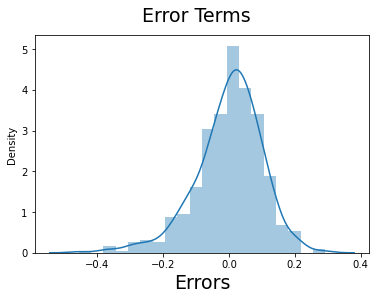

In [68]:
res = y_train-y_train_cnt

# Plot the histogram of the error terms
fig = plt.figure()
sns.distplot((res), bins = 20)
fig.suptitle('Error Terms', fontsize = 19)                  # Plot heading 
plt.xlabel('Errors', fontsize = 19)                         # X-label

### Insights:

- From the plot, we could see that residuals are normally distributed and hence, our assumption for linear regression is valid

## Making Predictions Using the Final Model

- Now that we have fitted the model and checked the assumptions, it's time to go ahead and make predictions using the final model (lr9)

In [69]:
# Apply scaler() to all numeric variables in test dataset. Note: we will only use scaler.transform, 
# as we want to use the metrics that the model learned from the training data to be applied on the test data. 
# In other words, we want to prevent the information leak from train to test dataset.

numv = ['temp', 'atemp', 'hum', 'windspeed','cnt']

df_test[numv] = scaler.transform(df_test[numv])

In [70]:
df_test.head()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
310,0,0,1,0.303293,0.206546,2.292490,0.071811,0.461689,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,1,0,0,0,0,0
320,0,0,0,0.244358,0.166537,1.709413,0.583358,0.348711,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0,0,0,0,0,1,1,0
189,0,0,1,0.677164,0.342202,1.815670,0.299998,0.611367,0,1,0,0,0,0,0,0,1,0,0,0,0,0,1,0,0,0,0,0,0,0
382,1,0,1,0.201998,0.141823,1.287047,0.810267,0.385872,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0
388,1,0,1,0.245279,0.179875,2.538205,0.208991,0.496664,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,1,0,0,0,0


In [71]:
df_test.describe()

,yr,holiday,workingday,temp,atemp,hum,windspeed,cnt,season_2,season_3,season_4,mnth_2,mnth_3,mnth_4,mnth_5,mnth_6,mnth_7,mnth_8,mnth_9,mnth_10,mnth_11,mnth_12,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,weathersit_2,weathersit_3
count,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000,219.000000
mean,0.497717,0.036530,0.707763,0.412258,0.243731,1.847594,0.344287,0.519768,0.219178,0.273973,0.269406,0.077626,0.082192,0.077626,0.063927,0.054795,0.091324,0.091324,0.114155,0.077626,0.095890,0.095890,0.146119,0.136986,0.146119,0.168950,0.141553,0.127854,0.315068,0.031963
std,0.501140,0.188034,0.455833,0.203098,0.084487,0.463782,0.157137,0.229815,0.414637,0.447017,0.444668,0.268194,0.275286,0.268194,0.245183,0.228100,0.288730,0.288730,0.318728,0.268194,0.295115,0.295115,0.354034,0.344621,0.354034,0.375566,0.349389,0.334692,0.465607,0.176306
min,0.000000,0.000000,0.000000,-0.067855,0.040740,0.684050,0.047450,0.069604,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.236531,0.169462,1.487787,0.230151,0.345950,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,1.000000,0.425768,0.253718,1.797073,0.320521,0.530028,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,0.583696,0.312116,2.159007,0.433733,0.699896,0.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,1.000000,0.805164,0.414403,2.973853,0.864144,0.959503,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [72]:
y_test = df_test.pop('cnt')
X_test = df_test
X_test.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 29 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   yr            219 non-null    int64  
 1   holiday       219 non-null    int64  
 2   workingday    219 non-null    int64  
 3   temp          219 non-null    float64
 4   atemp         219 non-null    float64
 5   hum           219 non-null    float64
 6   windspeed     219 non-null    float64
 7   season_2      219 non-null    uint8  
 8   season_3      219 non-null    uint8  
 9   season_4      219 non-null    uint8  
 10  mnth_2        219 non-null    uint8  
 11  mnth_3        219 non-null    uint8  
 12  mnth_4        219 non-null    uint8  
 13  mnth_5        219 non-null    uint8  
 14  mnth_6        219 non-null    uint8  
 15  mnth_7        219 non-null    uint8  
 16  mnth_8        219 non-null    uint8  
 17  mnth_9        219 non-null    uint8  
 18  mnth_10       219 non-null  

In [73]:
y_test

310    0.461689
320    0.348711
189    0.611367
382    0.385872
388    0.496664
         ...   
436    0.670156
657    0.928210
606    0.884837
417    0.546595
460    0.740681
Name: cnt, Length: 219, dtype: float64

In [74]:
#Selecting the variables that were part of final model.
col_1=X_train_rfe8.columns
X_test=X_test[col_1]
# Adding constant variable to test dataframe
X_test_lm8 = sm.add_constant(X_test)
X_test_lm8.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 219 entries, 310 to 460
Data columns (total 8 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   const         219 non-null    float64
 1   yr            219 non-null    int64  
 2   temp          219 non-null    float64
 3   windspeed     219 non-null    float64
 4   season_2      219 non-null    uint8  
 5   season_4      219 non-null    uint8  
 6   mnth_9        219 non-null    uint8  
 7   weathersit_3  219 non-null    uint8  
dtypes: float64(3), int64(1), uint8(4)
memory usage: 9.4 KB


In [75]:
# Making predictions using the final model (lr9)

y_pred = lr8.predict(X_test_lm8)

## Model Evaluation

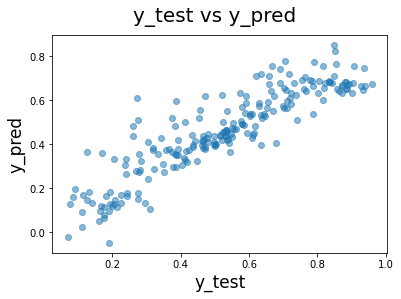

In [76]:
# Plotting y_test and y_pred to understand the spread

fig = plt.figure()
plt.scatter(y_test, y_pred, alpha=.52)
fig.suptitle('y_test vs y_pred', fontsize = 20)              # Plot heading 
plt.xlabel('y_test', fontsize = 17)                          # X-label
plt.ylabel('y_pred', fontsize = 17) 
plt.show()

### R-Squared value Test

In [77]:
from sklearn.metrics import r2_score
r2=r2_score(y_test, y_pred)
r2

0.71932912181314

### Adjusted R-Squared value Test

In [78]:
# n is number of rows in X

n = X_test.shape[0]


# Number of features (predictors, p) is the shape along axis 1
p = X_test.shape[1]

# We find the Adjusted R-squared using the formula

adjusted_r2 = 1-(1-r2)*(n-1)/(n-p-1)
adjusted_r2

0.7100177656647608

### Final model equation

cnt = 0.0936 + (yr × 0.2266) + (temp × 0.5596) − (windspeed × 0.1044) + (season_2 × 0.0757) + (season_4 × 0.1386) + (mnth_9 × 0.0873) - (weathersit_3 × 0.2678)

### All predictor variables:

- yr

- temp

- windspeed

- season_2

- season_4

- mnth_9

- weathersit_3

#### NOTE:
- yr : year
- temp : temperature
- mnth_9 : september
- weathersit_3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
- season_2: spring
- season_4: winter


### Top 3 most important predictor variables: 

- Temperature (temp) - A coefficient value of ‘0.0936’ indicated that a unit increase in temp variable increases the bike hire numbers by 0.0936 units.

- Year (yr) - A coefficient value of ‘0.2266’ indicated that a unit increase in yr variable increases the bike hire numbers by 0.2266 units.

- Weather Situation 3 (weathersit_3) - A coefficient value of ‘-0.2678’ indicated that, a unit increase in weathersit_3 variable decreases the bike hire numbers by 0.2678 units.

### Other important predictor variables to watchout for:

- season_4: - A coefficient value of ‘0.1386’ indicated a unit increase in season_4 variable increases the bike hire numbers by 0.1386 units.

- windspeed: - A coefficient value of ‘-0.1044’ indicated that, a unit increase in windspeed variable decreases the bike hire numbers by 0.1044 units.